#Refl1D neutron simulation

Goal: Simulate the neutron scattering results from Max Wolff paper of PRL2019


Note:
1)The finished code saved in backup folder. 
2)The samples structure see our proposal for ILL Super ADAM.

The structure of the thin film in nm:     film = pd | al2o3(7.28) | v(0.75) | fe(15.7) | v(108.1) | fe(15.7) | v(0.756) | mgo(1000)

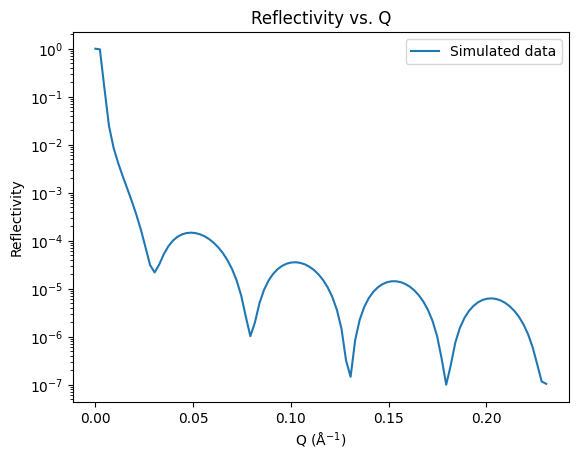

In [17]:
#This code is for simulate Neutron_singleReson Fe/V thin film:
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.0)
al2o3 = SLD(name='Al2O3', rho=3.0)
v = SLD(name='V', rho=4.0)
fe = SLD(name='Fe', rho=5.7)
mgo = SLD(name='MgO', rho=3.7)
lif = SLD(name='LiF', rho=2.301)

film = pd | al2o3(7.28) | v(0.75) | fe(15.7) | v(108.1) | fe(15.7) | v(0.756) | mgo(1000000)
#film = pd | al2o3(7.28) | v(0.75) | fe(15.7) | v(108.1) | fe(15.7) | v(0.756) | lif(1000000)
# Define temperature range and probe
T = np.linspace(0, 5, 100)
probe = NeutronProbe(T=T, dT=0.01, L=4.75, dL=0.0475)

# Create experiment and simulate data
M = Experiment(probe=probe, sample=film)
M.simulate_data(5)

# Plot simulated data and set y-axis to log scale
Q, R = M.reflectivity()
plt.plot(Q, R, label='Simulated data')
plt.yscale('log')

# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')
plt.savefig('Pd-Al2O3-V-Fe-V-Fe-MgO.png')

# Show plot
plt.show()


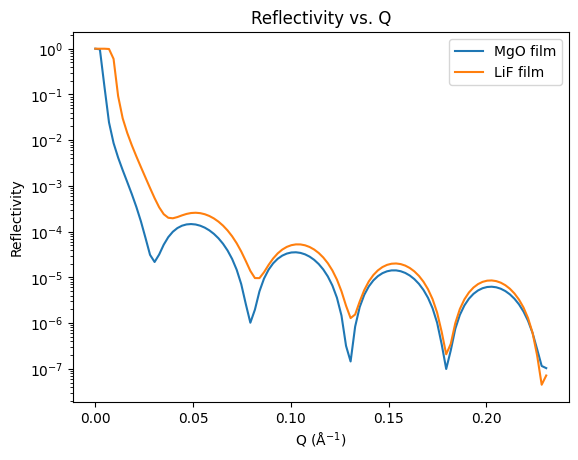

In [18]:
#This code will simulate the neutron reflectivity data for both MgO and LiF films
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.0)
al2o3 = SLD(name='Al2O3', rho=3.0)
v = SLD(name='V', rho=4.0)
fe = SLD(name='Fe', rho=5.7)
mgo = SLD(name='MgO', rho=3.7)
lif = SLD(name='LiF', rho=2.301)

film_mgo = pd | al2o3(7.28) | v(0.75) | fe(15.7) | v(108.1) | fe(15.7) | v(0.756) | mgo(1000000)
film_lif = pd | al2o3(7.28) | v(0.75) | fe(15.7) | v(108.1) | fe(15.7) | v(0.756) | lif(1000000)

# Define temperature range and probe
T = np.linspace(0, 5, 100)
probe = NeutronProbe(T=T, dT=0.01, L=4.75, dL=0.0475)

# Create experiment and simulate data for both films
M_mgo = Experiment(probe=probe, sample=film_mgo)
M_mgo.simulate_data(5)

M_lif = Experiment(probe=probe, sample=film_lif)
M_lif.simulate_data(5)

# Plot simulated data and set y-axis to log scale
Q_mgo, R_mgo = M_mgo.reflectivity()
plt.plot(Q_mgo, R_mgo, label='MgO film')

Q_lif, R_lif = M_lif.reflectivity()
plt.plot(Q_lif, R_lif, label='LiF film')

plt.yscale('log')

# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')
plt.savefig('MgO-LiF-Fe-V-Fe-LiF-MgO.png')

# Show plot
plt.show()


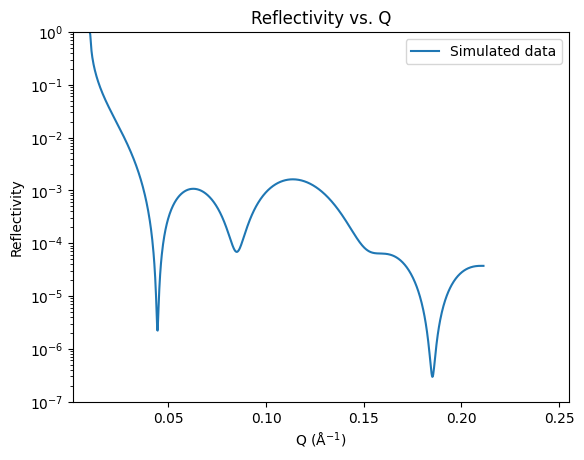

In [3]:
#This code is for simulate Neutron_tripleReson30_35_40 Fe/V thin film:
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672) #rho=3.0?
v = SLD(name='V', rho=-0.32) #rho=4.0?
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014) #rho=3.7

film = mgo(1000000)|v(0.756)| fe(15.7) | v(30) | fe(15.7)|v(35)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)

# Set fitting parameters
film[0].interface.range(0, 1)
film[1].interface.range(0, 1)
film[2].interface.range(0, 1)
film[3].interface.range(0, 1)
film[4].interface.range(0, 1)
film[5].interface.range(0, 1)
film[6].interface.range(0, 1)
film[7].interface.range(0, 1)
film[8].interface.range(0, 1)
film[9].interface.range(0, 1)
film[10].interface.range(0, 1)
film[11].interface.range(0, 1)


# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915) #wavelength

# Create experiment and simulate data
M = Experiment(probe=probe, sample=film)
M.simulate_data(3600)

# Plot simulated data and set y-axis to log scale
Q, R = M.reflectivity()
plt.plot(Q, R, label='Simulated data')
plt.yscale('log')

plt.xlim(0.001, 0.255)
#plt.xticks(np.arange(0,1,0.01))
plt.ylim(0.0000001, 1)
#plt.xticks(np.arange(0.001, 0.26, 0.01))
#plt.yticks(np.arange(0,0.26,0.01))


# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')
plt.savefig('Pd-Al2O3-V-Fe-V-Fe-MgO.png')

# Show plot
plt.show()


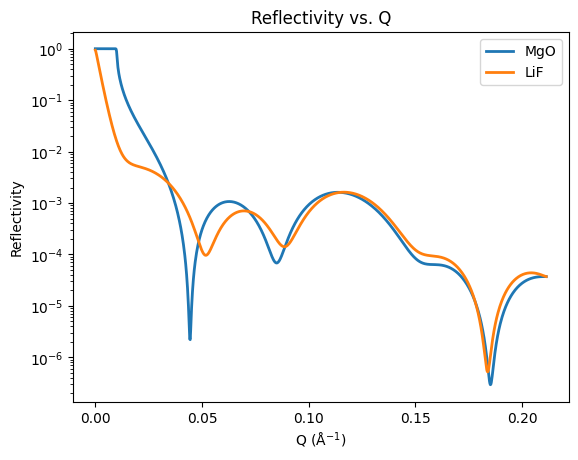

In [19]:
#Here's the updated code with two film samples (MgO and LiF) and plotted together in one figure:
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672)
v = SLD(name='V', rho=-0.32)
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014)
lif = SLD(name='LiF', rho=2.301)

# Define film structures
film1 = mgo(1000000)|v(0.756)| fe(15.7) | v(30) | fe(15.7)|v(35)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)
film2 = lif(1000000)|v(0.756)| fe(15.7) | v(30) | fe(15.7)|v(35)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)

# Set fitting parameters for both films
for layer in film1:
    layer.interface.range(0, 1)
for layer in film2:
    layer.interface.range(0, 1)

# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915)

# Create experiment and simulate data for both films
M1 = Experiment(probe=probe, sample=film1)
M1.simulate_data(3600)
M2 = Experiment(probe=probe, sample=film2)
M2.simulate_data(3600)

# Plot simulated data and set y-axis to log scale
Q1, R1 = M1.reflectivity()
Q2, R2 = M2.reflectivity()
plt.plot(Q1, R1, label='MgO', linewidth=2)
plt.plot(Q2, R2, label='LiF', linewidth=2)
plt.yscale('log')

# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')

# Save and show plot
plt.savefig('MgO-LiF.png')
plt.show()


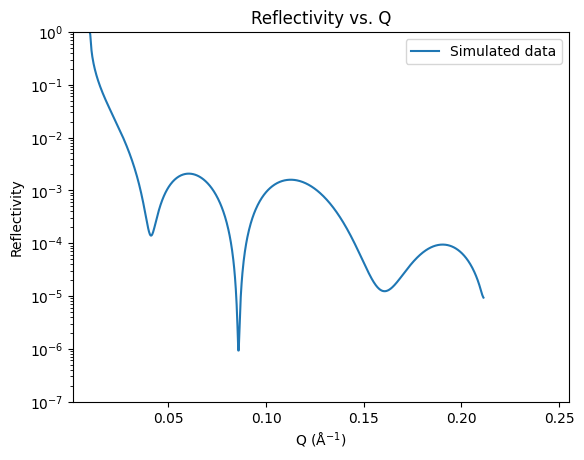

In [20]:
#This code is for simulate Neutron_tripleReson40_35_30 Fe/V thin film:
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672) #rho=3.0?
v = SLD(name='V', rho=-0.32) #rho=4.0?
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014) #rho=3.7

film = mgo(1000000)|v(0.756)| fe(15.7) | v(40) | fe(15.7)|v(30)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)

# Set fitting parameters roughness range
film[0].interface.range(0, 1)
film[1].interface.range(0, 1)
film[2].interface.range(0, 1)
film[3].interface.range(0, 1)
film[4].interface.range(0, 1)
film[5].interface.range(0, 1)
film[6].interface.range(0, 1)
film[7].interface.range(0, 1)
film[8].interface.range(0, 1)
film[9].interface.range(0, 1)
film[10].interface.range(0, 1)
film[11].interface.range(0, 1)


# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915) #wavelength

# Create experiment and simulate data
M = Experiment(probe=probe, sample=film)
M.simulate_data(3600)

# Plot simulated data and set y-axis to log scale
Q, R = M.reflectivity()
plt.plot(Q, R, label='Simulated data')
plt.yscale('log')

plt.xlim(0.001, 0.255)
#plt.xticks(np.arange(0,1,0.01))
plt.ylim(0.0000001, 1)
#plt.xticks(np.arange(0.001, 0.26, 0.01))
#plt.yticks(np.arange(0,0.26,0.01))


# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')
plt.savefig('Pd-Al2O3-V-Fe-V-Fe-MgO.png')

# Show plot
plt.show()


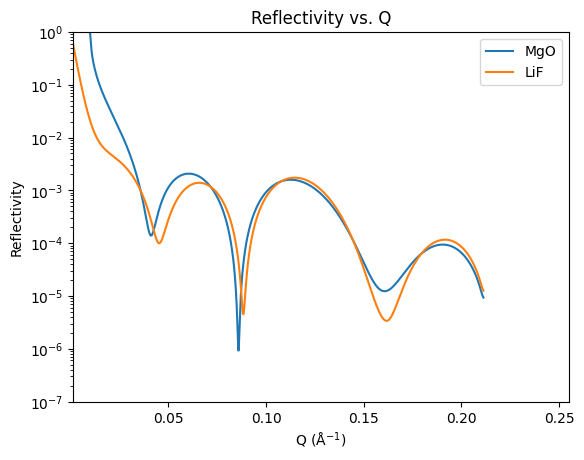

In [28]:
#Here's an updated code that includes two film samples, MgO and LiF, and plots the results into one figure:
import matplotlib.pyplot as plt
from refl1d.names import *

pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672) #rho=3.0?
v = SLD(name='V', rho=-0.32) #rho=4.0?
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014) #rho=3.7
lif = SLD(name='LiF', rho=2.301)

film1 = mgo(1000000)|v(0.756)| fe(15.7) | v(40) | fe(15.7)|v(30)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)
film2 = lif(1000000)|v(0.756)| fe(15.7) | v(40) | fe(15.7)|v(30)|fe(15.7)|v(40)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)

# Set fitting parameters roughness range
for i in range(12):
    film1[i].interface.range(0, 1)
    film2[i].interface.range(0, 1)

# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915) #wavelength

# Create experiments and simulate data
M1 = Experiment(probe=probe, sample=film1)
M1.simulate_data(3600)

M2 = Experiment(probe=probe, sample=film2)
M2.simulate_data(3600)

# Plot simulated data
Q, R1 = M1.reflectivity()
Q, R2 = M2.reflectivity()

fig, ax = plt.subplots()
ax.plot(Q, R1, label='MgO')
ax.plot(Q, R2, label='LiF')

# Set axis labels and legend
ax.set_xlabel('Q (Å$^{-1}$)')
ax.set_ylabel('Reflectivity')
ax.legend()
ax.set_title('Reflectivity vs. Q')

# Set y-axis to log scale
ax.set_yscale('log')

plt.xlim(0.001, 0.255)
#plt.xticks(np.arange(0,1,0.01))
plt.ylim(0.0000001, 1)

# Save and show plot
plt.savefig('MgO-LiF.png')
plt.show()


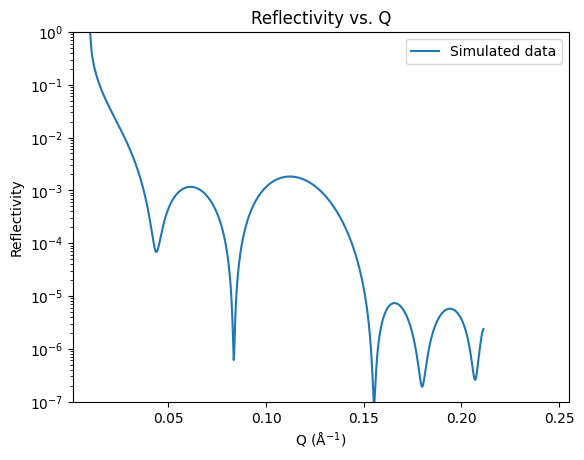

In [5]:
#This code is for simulate Neutron_tripleReson36_36_36 Fe/V thin film:
import matplotlib.pyplot as plt
from refl1d.names import *

##SLD_n Ref:/Users/pengp/Library/CloudStorage/OneDrive-Chalmers/Neutron scattering/Projects
pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672)
v = SLD(name='V', rho=-0.32)
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014)

film = mgo(1000000)|v(0.756)| fe(15.7) | v(36) | fe(15.7)|v(36)|fe(15.7)|v(36)|fe(15.7)|v(0.756)|al2o3(7.28) | pd(1.3)

# Set fitting parameters
film[0].interface.range(0, 1)
film[1].interface.range(0, 1)
film[2].interface.range(0, 1)
film[3].interface.range(0, 1)
film[4].interface.range(0, 1)
film[5].interface.range(0, 1)
film[6].interface.range(0, 1)
film[7].interface.range(0, 1)
film[8].interface.range(0, 1)
film[9].interface.range(0, 1)
film[10].interface.range(0, 1)
film[11].interface.range(0, 1)


# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915) #wavelength

# Create experiment and simulate data
M = Experiment(probe=probe, sample=film)
M.simulate_data(3600)

# Plot simulated data and set y-axis to log scale
Q, R = M.reflectivity()
plt.plot(Q, R, label='Simulated data')
plt.yscale('log')

plt.xlim(0.001, 0.255)
#plt.xticks(np.arange(0,1,0.01))
plt.ylim(0.0000001, 1)
#plt.xticks(np.arange(0.001, 0.26, 0.01))
#plt.yticks(np.arange(0,0.26,0.01))


# Set axis labels and legend
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Reflectivity vs. Q')
plt.savefig('Pd-Al2O3-V-Fe-V-Fe-MgO.png')

# Show plot
plt.show()


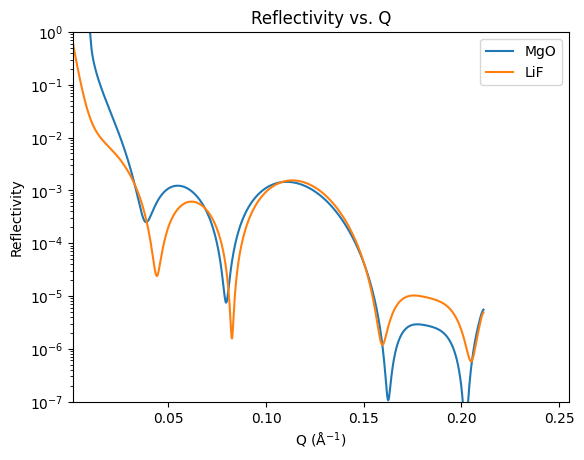

In [27]:
#Here's an updated code that includes two film samples, MgO and LiF, and plots the results into one figure:
import matplotlib.pyplot as plt
from refl1d.names import *

# Define SLDs for materials
pd = SLD(name='Pd', rho=4.02)
al2o3 = SLD(name='Al2O3', rho=5.672)
v = SLD(name='V', rho=-0.32)
fe = SLD(name='Fe', rho=8.024)
mgo = SLD(name='MgO', rho=6.014)
lif = SLD(name='LiF', rho=2.301)

# Define films
film1 = mgo(1000000) | v(0.756) | fe(15.7) | v(36) | fe(15.7) | v(36) | fe(15.7) | v(36) | v(0.756) | al2o3(7.28) | pd(1.3)
film2 = lif(1000000) | v(0.756) | fe(15.7) | v(36) | fe(15.7) | v(36) | fe(15.7) | v(36) | v(0.756) | al2o3(7.28) | pd(1.3)

# Set fitting parameters
for f in [film1, film2]:
    f[0].interface.range(0, 1)
    f[1].interface.range(0, 1)
    f[2].interface.range(0, 1)
    f[3].interface.range(0, 1)
    f[4].interface.range(0, 1)
    f[5].interface.range(0, 1)
    f[6].interface.range(0, 1)
    f[7].interface.range(0, 1)
    f[8].interface.range(0, 1)
    f[9].interface.range(0, 1)
    f[10].interface.range(0, 1)

# Define temperature range and probe
T = np.linspace(0, 5, 1000)
probe = NeutronProbe(T=T, dT=0.01, L=5.183, dL=0.025915) #wavelength

# Create experiments and simulate data
M1 = Experiment(probe=probe, sample=film1)
M1.simulate_data(3600)
M2 = Experiment(probe=probe, sample=film2)
M2.simulate_data(3600)

# Plot simulated data for both films and set y-axis to log scale
Q1, R1 = M1.reflectivity()
Q2, R2 = M2.reflectivity()
fig, ax = plt.subplots()
ax.plot(Q1, R1, label='MgO')
ax.plot(Q2, R2, label='LiF')
ax.set_yscale('log')

plt.xlim(0.001, 0.255)
plt.ylim(0.0000001, 1)

# Set axis labels and legend
ax.set_xlabel('Q (Å$^{-1}$)')
ax.set_ylabel('Reflectivity')
ax.legend()
ax.set_title('Reflectivity vs. Q')

# Save and show plot
plt.savefig('MgO-LiF.png')
plt.show()




In [29]:
pip install pandoc

12855.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 860.0 kB/s eta 0:00:00 0:00:01
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=00336a3e540494d034f7fdce01f81620d755d4ff100fe867460a25996e97f64e
  Stored in directory: /Users/pengp/Library/Caches/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install nbconvert[webpdf]


13111.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.
